In [9]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [10]:
data = pd.read_csv("IMDB Dataset.csv")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [11]:
data.shape

(50000, 2)

In [12]:
print('Class distribution: ', data['sentiment'].value_counts())

Class distribution:  sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [13]:
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [14]:
print(data.nunique())

review       49582
sentiment        2
dtype: int64


In [15]:
import re
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load spacy model once (not inside function)
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return "" 
    
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r"[^a-z\s]", "", text)
    
    text = text.strip()
    
    # Split and remove stopwords & empty tokens
    words = [w for w in text.split() if w and w not in STOP_WORDS]
    
    # Lemmatize
    doc = nlp(" ".join(words))
    lemmas = [token.lemma_ for token in doc if token.text.strip()]
    
    
    return " ".join(lemmas)


In [16]:
data["clean_review"] = data["review"].apply(preprocess_text)

data.head()

data.to_csv("IMDB Dataset_Cleaned.csv")

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=3)

le = LabelEncoder()

y = le.fit_transform(data['sentiment'])

X = tfidf.fit_transform(data['clean_review'])



In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.853


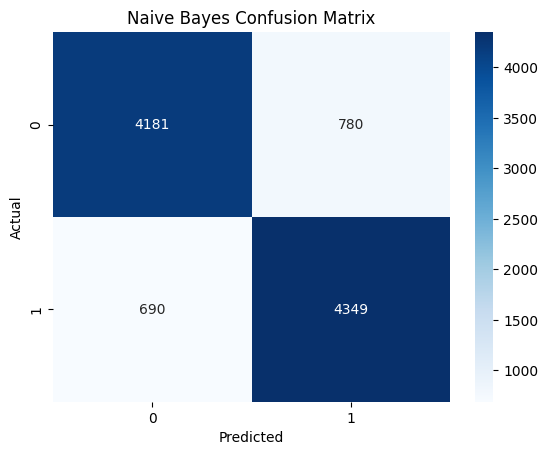

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


XGBoost Accuracy: 0.8634


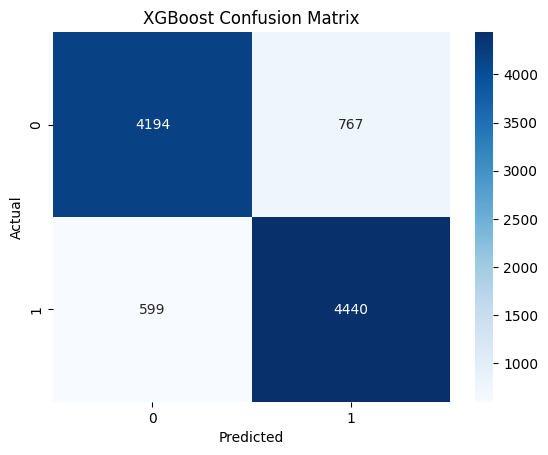

In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()
